<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°05





**Objetivo**: Explorar y visualizar datos de Netflix usando **matplotlib** y **seaborn/plotly**, aprendiendo a elegir gráficos adecuados para distintos tipos de variables y preguntas de análisis.



**Dataset**:

Trabajaremos con el archivo `netflix_titles.csv`, que contiene información sobre los títulos disponibles en la plataforma Netflix hasta el año 2021.

| Variable       | Clase     | Descripción                                                                 |
|----------------|-----------|------------------------------------------------------------------------------|
| show_id        | caracter  | Identificador único del título en el catálogo de Netflix.                   |
| type           | caracter  | Tipo de contenido: 'Movie' o 'TV Show'.                                     |
| title          | caracter  | Título del contenido.                                                       |
| director       | caracter  | Nombre del director (puede ser nulo).                                       |
| cast           | caracter  | Lista de actores principales (puede ser nulo).                              |
| country        | caracter  | País o países donde se produjo el contenido.                                |
| date_added     | fecha     | Fecha en la que el título fue agregado al catálogo de Netflix.              |
| release_year   | entero    | Año de lanzamiento original del título.                                     |
| rating         | caracter  | Clasificación por edad (por ejemplo: 'PG-13', 'TV-MA').                      |
| duration       | caracter  | Duración del contenido (minutos o número de temporadas para series).        |
| listed_in      | caracter  | Categorías o géneros en los que está clasificado el contenido.              |
| description    | caracter  | Breve sinopsis del contenido.                                               |




In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [41]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 📊 Parte 1: Exploración visual básica

1. **Distribución de tipos de contenido**

   * Realiza un gráfico de barras mostrando la cantidad de películas vs series (`type`).
   * Pregunta guía: ¿Cuál es el tipo de contenido predominante en Netflix? ¿Qué implicancias podría tener para los usuarios?

2. **Histograma de años de lanzamiento**

   * Muestra cómo se distribuyen los títulos según su `release_year`.
   * Pregunta guía: ¿Hay más contenido reciente o antiguo? ¿Notas algún patrón en décadas específicas?

3. **Proporción de clasificaciones por edad (`rating`)**

   * Haz un gráfico circular o de barras.
   * Pregunta guía: ¿Qué clasificación es más común? ¿Crees que Netflix está más enfocado en público adulto, familiar o infantil?



/tmp/ipython-input-3569890034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts_type, x="type", y="count", palette="Set2")


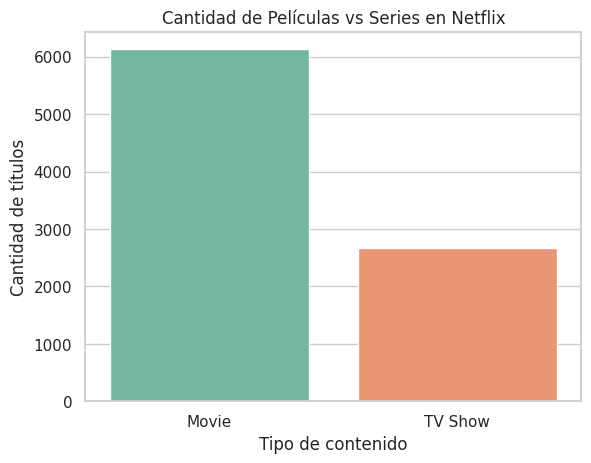

      type  count
0    Movie   6131
1  TV Show   2676


In [42]:
#1
counts_type = df["type"].value_counts().rename_axis("type").reset_index(name="count")
sns.barplot(data=counts_type, x="type", y="count", palette="Set2")
plt.title("Cantidad de Películas vs Series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad de títulos")
plt.show()

print(counts_type)
#Notamos que el tipo de contenido más predominante en Netflix son las peliculos
#alguna implicancia para los ususarios podria ser favorecer el consumo rapido, pues las peliculas son más cortas que las series


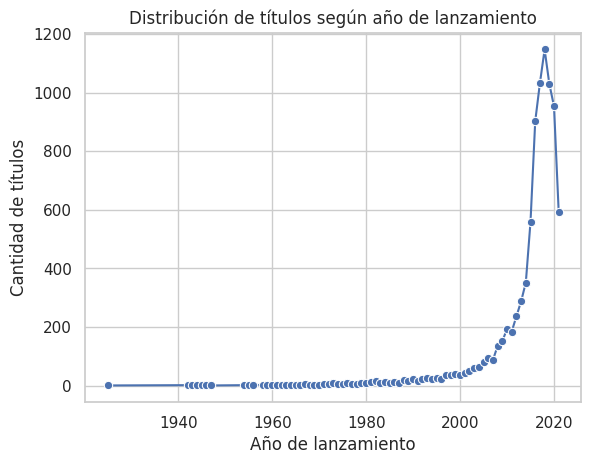

    release_year  count
69          2017   1032
70          2018   1147
71          2019   1030
72          2020    953
73          2021    592


In [43]:
#2
titles_by_year = (
    df.groupby("release_year")["show_id"]
      .count()
      .reset_index(name="count")
      .sort_values("release_year")
)

sns.lineplot(data=titles_by_year, x="release_year", y="count", marker="o")
plt.title("Distribución de títulos según año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Cantidad de títulos")
plt.show()

print(titles_by_year.tail())

#Del grafico podemos interpretar que hay más contenido nuevo, de hecho sube de manera rapida mientras se acerca a los años actuales

/tmp/ipython-input-1790879662.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratings_count, x="rating", y="count", palette="muted")


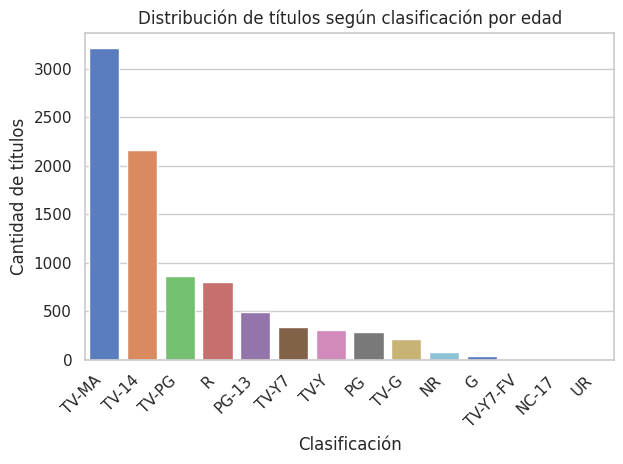

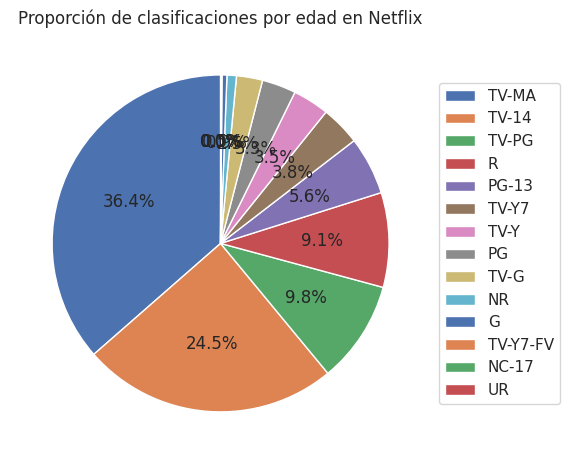

  rating  count
0  TV-MA   3207
1  TV-14   2160
2  TV-PG    863
3      R    799
4  PG-13    490
5  TV-Y7    334
6   TV-Y    307
7     PG    287
8   TV-G    220
9     NR     80


In [44]:
#3
valid_ratings = {
    "TV-MA","TV-14","TV-PG","PG-13","TV-Y7","TV-Y","TV-G",
    "R","PG","G","NC-17","TV-Y7-FV","NR","UR"
}

df["rating"] = df["rating"].astype("string").str.strip()
df.loc[~df["rating"].isin(valid_ratings), "rating"] = pd.NA

ratings_count = df["rating"].dropna().value_counts().reset_index()
ratings_count.columns = ["rating", "count"]
ratings_count = ratings_count.sort_values("count", ascending=False)

sns.barplot(data=ratings_count, x="rating", y="count", palette="muted")
plt.title("Distribución de títulos según clasificación por edad")
plt.xlabel("Clasificación")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.pie(ratings_count["count"], labels=None, autopct="%1.1f%%", startangle=90)
plt.title("Proporción de clasificaciones por edad en Netflix")
plt.legend(ratings_count["rating"], loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

print(ratings_count.head(10))

#Notamops que la clasificación más común es TV-MA, lo que muestra que Netflix está principalmente enfocado en público adulto y juvenil, con menor tendencia de contenido familiar o infantil.



## 🎨 Parte 2: Tendencias y evolución en el tiempo

4. **Número de títulos agregados por año**

   * Usa `date_added` (convertido a fecha) y grafica una serie temporal.
   * Pregunta guía: ¿Cuándo creció más el catálogo de Netflix? ¿Qué relación podría tener con la expansión internacional de la plataforma?

5. **Heatmap de lanzamientos por año y mes**

   * Construye un mapa de calor con `year_added` y `month_added`.
   * Pregunta guía: ¿Hay meses con más estrenos que otros? ¿Qué conclusiones puedes sacar sobre la estacionalidad de lanzamientos?

6. **Duración de películas por género**

   * Extrae la duración en minutos y crea un boxplot agrupado por género principal.
   * Pregunta guía: ¿Qué géneros suelen durar más? ¿Qué podrías decir sobre la variabilidad dentro de un mismo género?


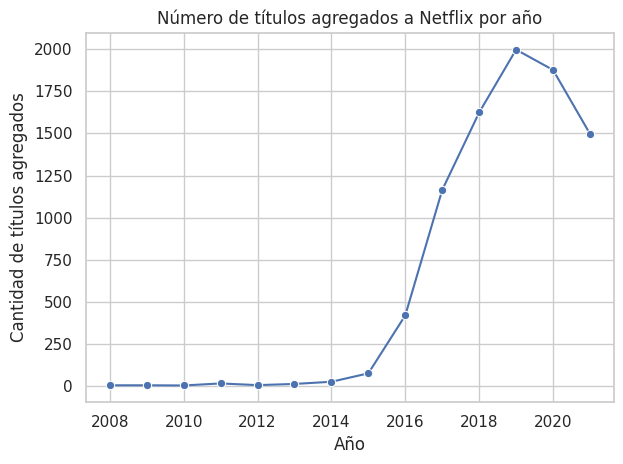

    year_added  count
9       2017.0   1164
10      2018.0   1625
11      2019.0   1999
12      2020.0   1878
13      2021.0   1498


In [45]:
#4
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

df["year_added"] = df["date_added"].dt.year

titles_added = (
    df.groupby("year_added")["show_id"]
      .count()
      .reset_index(name="count")
      .dropna()
      .sort_values("year_added")
)

sns.lineplot(data=titles_added, x="year_added", y="count", marker="o")
plt.title("Número de títulos agregados a Netflix por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos agregados")
plt.tight_layout()
plt.show()

print(titles_added.tail())
#Vemos que el catálogo de Netflix creció más a partir de 2015–2016, coincidiendo con su expansión internacional y la producción de contenido original
#esto explica el fuerte aumento en títulos agregados esos años

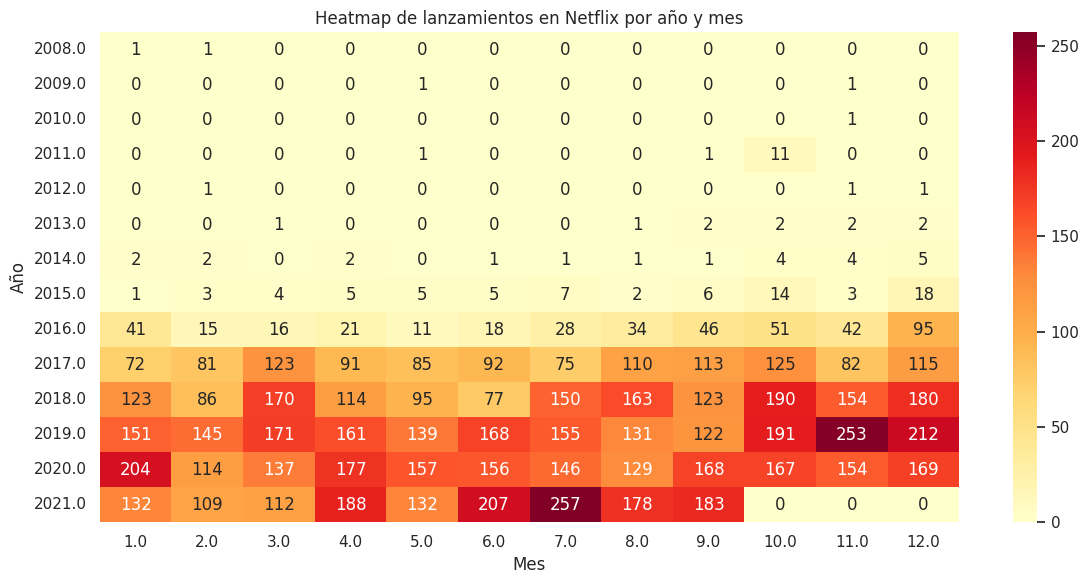

In [46]:
#5
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

heatmap_data = (
    df.pivot_table(index="year_added", columns="month_added", values="show_id", aggfunc="count")
    .fillna(0)
    .astype(int)
)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt="d", cbar=True)
plt.title("Heatmap de lanzamientos en Netflix por año y mes")
plt.xlabel("Mes")
plt.ylabel("Año")
plt.tight_layout()
plt.show()
#Vemos que se observan meses con más estrenos, en especial enero y julio-diciembre, lo que refleja la llegada de vacaciones y fin de año.

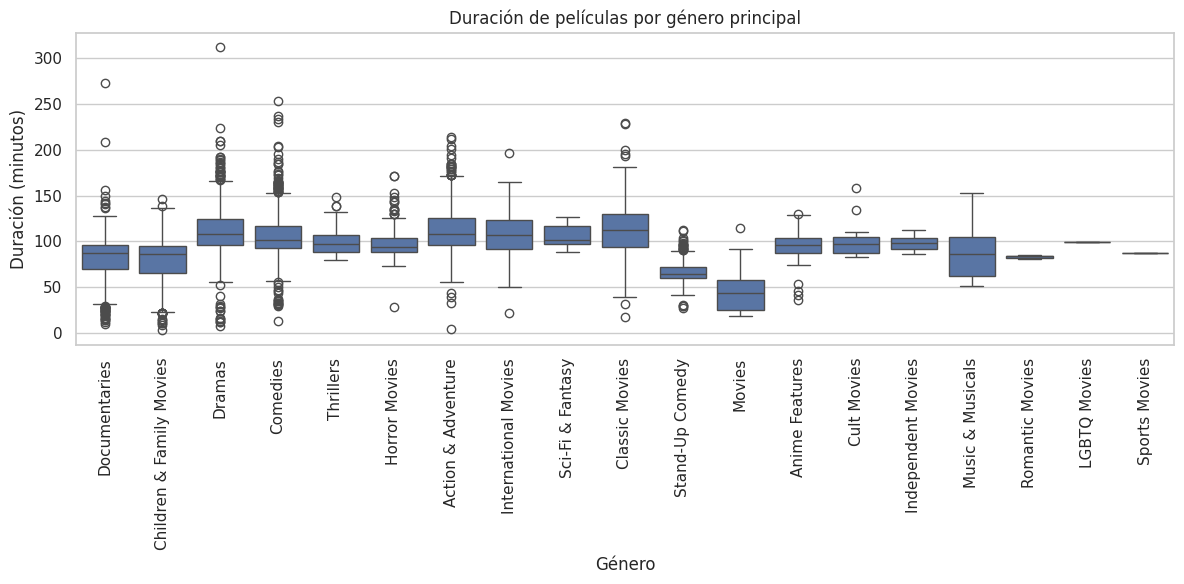

In [47]:
#6
movies = df[df["type"] == "Movie"].copy()

def parse_duration(x):
    if pd.isna(x):
        return None
    if "min" in x:
        return int(x.replace("min", "").strip())
    return None

movies["duration_min"] = movies["duration"].apply(parse_duration)
movies["main_genre"] = movies["listed_in"].astype("string").str.split(",").str[0].str.strip()
movies_clean = movies.dropna(subset=["duration_min", "main_genre"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_clean, x="main_genre", y="duration_min")
plt.xticks(rotation=90)
plt.title("Duración de películas por género principal")
plt.xlabel("Género")
plt.ylabel("Duración (minutos)")
plt.tight_layout()
plt.show()
#Notamos que los géneros como dramas y documentales suelen tener mayor duración, mientras que domedias e infantiles son más cortas
#Además la variabilidad dentro de un género es alta, lo que indica que no existe una duración estándar.



## 🔥 Parte 3: Comparaciones y relaciones

7. **Top 10 países con más producciones**

   * Usa un gráfico de barras para mostrar los países más frecuentes en la columna `country`.
   * Pregunta guía: ¿Qué países dominan el catálogo? ¿Sorprende la distribución o es esperada?

8. **Películas vs Series según género**

   * Realiza un gráfico de barras apiladas para mostrar la cantidad de títulos por género, separando `Movie` y `TV Show`.
   * Pregunta guía: ¿Existen géneros más asociados a películas o a series?

9. **Relación entre duración y año de lanzamiento**

   * Haz un gráfico de dispersión (scatterplot) con `release_year` en el eje X y `duration` (en minutos) en el eje Y.
   * Pregunta guía: ¿Han cambiado los estándares de duración de las películas con el tiempo? ¿Se ven outliers interesantes?



          country  count
0   United States   3690
1           India   1046
2  United Kingdom    806
3          Canada    445
4          France    393


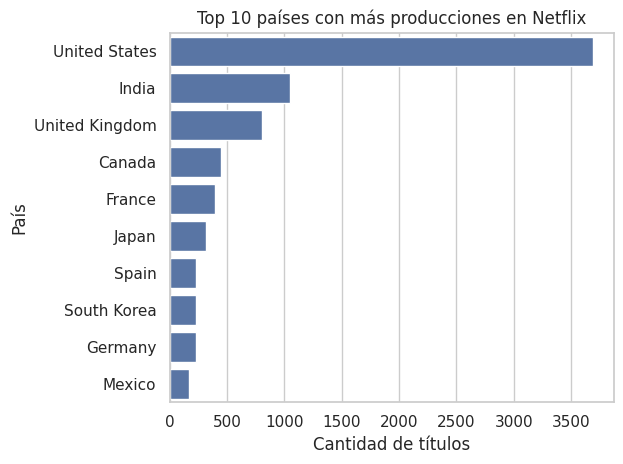

In [48]:
#7
df_countries = (
    df.assign(country=df["country"].astype("string").str.split(","))
      .explode("country", ignore_index=True)
)
df_countries["country"] = df_countries["country"].astype("string").str.strip()
df_countries = df_countries.dropna(subset=["country"])

top_countries = df_countries["country"].value_counts().head(10).reset_index()
top_countries.columns = ["country", "count"]

print(top_countries.head())

sns.barplot(data=top_countries, y="country", x="count")
plt.title("Top 10 países con más producciones en Netflix")
plt.xlabel("Cantidad de títulos")
plt.ylabel("País")
plt.tight_layout()
plt.show()

#Los paises que dominan el catálogo son Estados unidos, India y Reino unido, la distribucion es esperada.

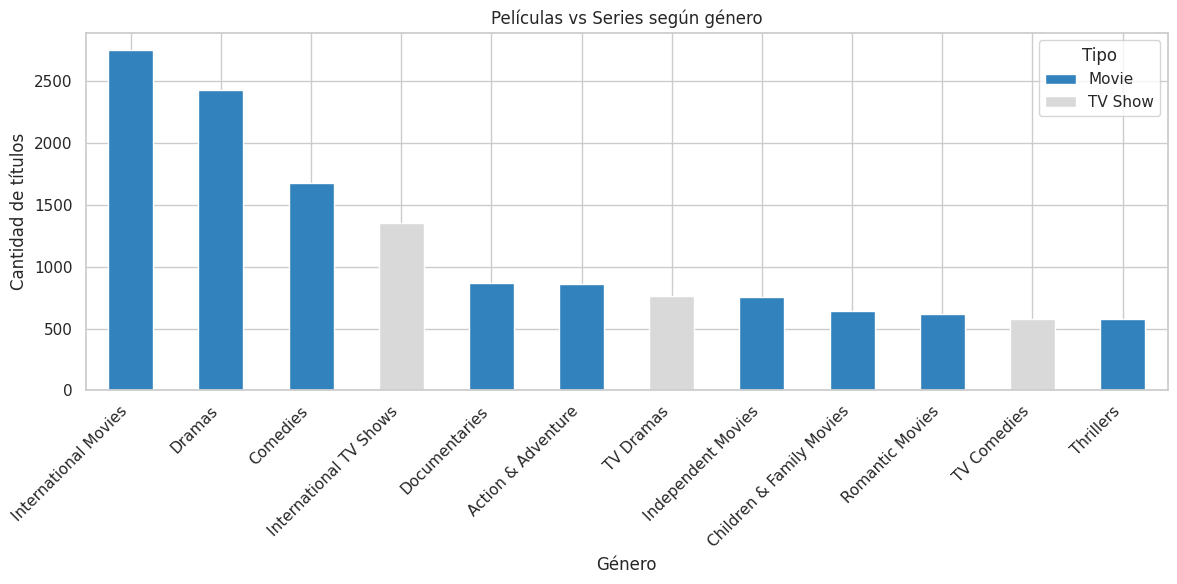

In [49]:
#8

df_genres = (
    df.assign(listed_in=df["listed_in"].astype("string").str.split(","))
      .explode("listed_in", ignore_index=True)
)
df_genres["listed_in"] = df_genres["listed_in"].str.strip()

genre_type_counts = (
    df_genres.groupby(["listed_in", "type"])["show_id"]
    .count()
    .reset_index(name="count")
)

pivot_genre_type = genre_type_counts.pivot(index="listed_in", columns="type", values="count").fillna(0)

top_genres = pivot_genre_type.sum(axis=1).nlargest(12).index
pivot_top = pivot_genre_type.loc[top_genres]

pivot_top.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20c")
plt.title("Películas vs Series según género")
plt.xlabel("Género")
plt.ylabel("Cantidad de títulos")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Tipo", loc="upper right")
plt.tight_layout()
plt.show()

#Sí, algunos géneros se asocian más a películas (como Dramas y Comedias), mientras que otros están más presentes en series (como TV Shows para Niños o International TV)

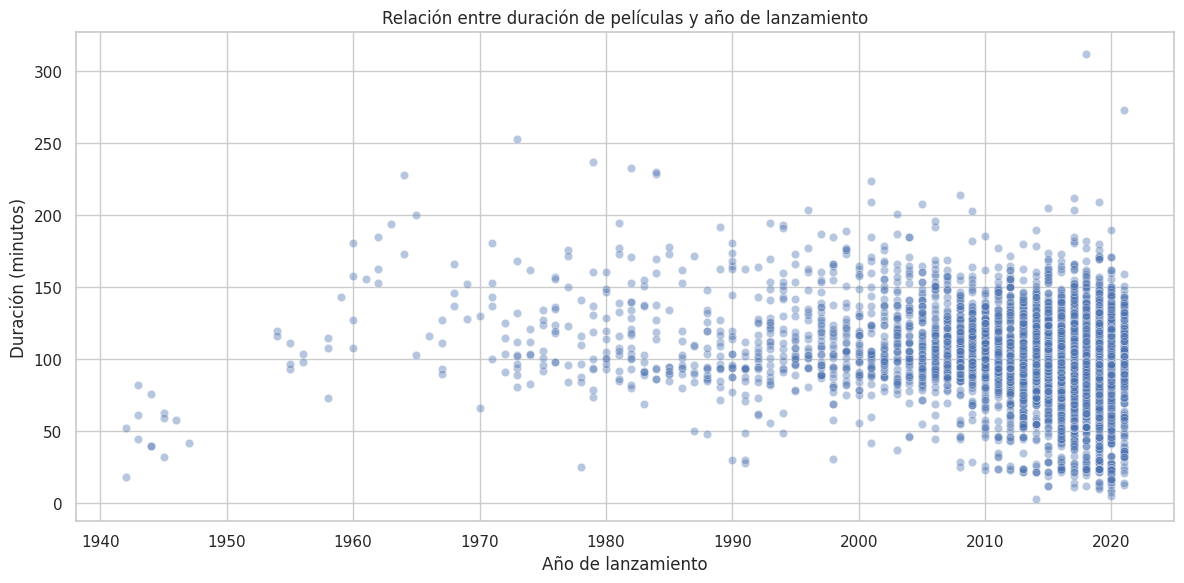

In [50]:
#9
movies = df[df["type"] == "Movie"].copy()
def parse_duration(x):
    if pd.isna(x):
        return None
    if "min" in x:
        return int(x.replace("min", "").strip())
    return None

movies["duration_min"] = movies["duration"].apply(parse_duration)

movies_clean = movies.dropna(subset=["duration_min", "release_year"])

plt.figure(figsize=(12,6))
sns.scatterplot(data=movies_clean, x="release_year", y="duration_min", alpha=0.4)
plt.title("Relación entre duración de películas y año de lanzamiento")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Duración (minutos)")
plt.tight_layout()
plt.show()

#Los estándares de duración se han mantenido relativamente estables en torno a 90–120 minutos, aunque con variabilidad.
#Se observan outliers (películas muy largas o muy cortas), pero no un cambio claro a lo largo del tiempo.

## ⭐ Desafío Final

* Encuentra las combinaciones más frecuentes de **género + rating** y represéntalas en un **heatmap o gráfico de burbujas**.
* Pregunta guía: ¿Qué géneros están más dirigidos a un público adulto? ¿Y cuáles a público familiar o infantil?

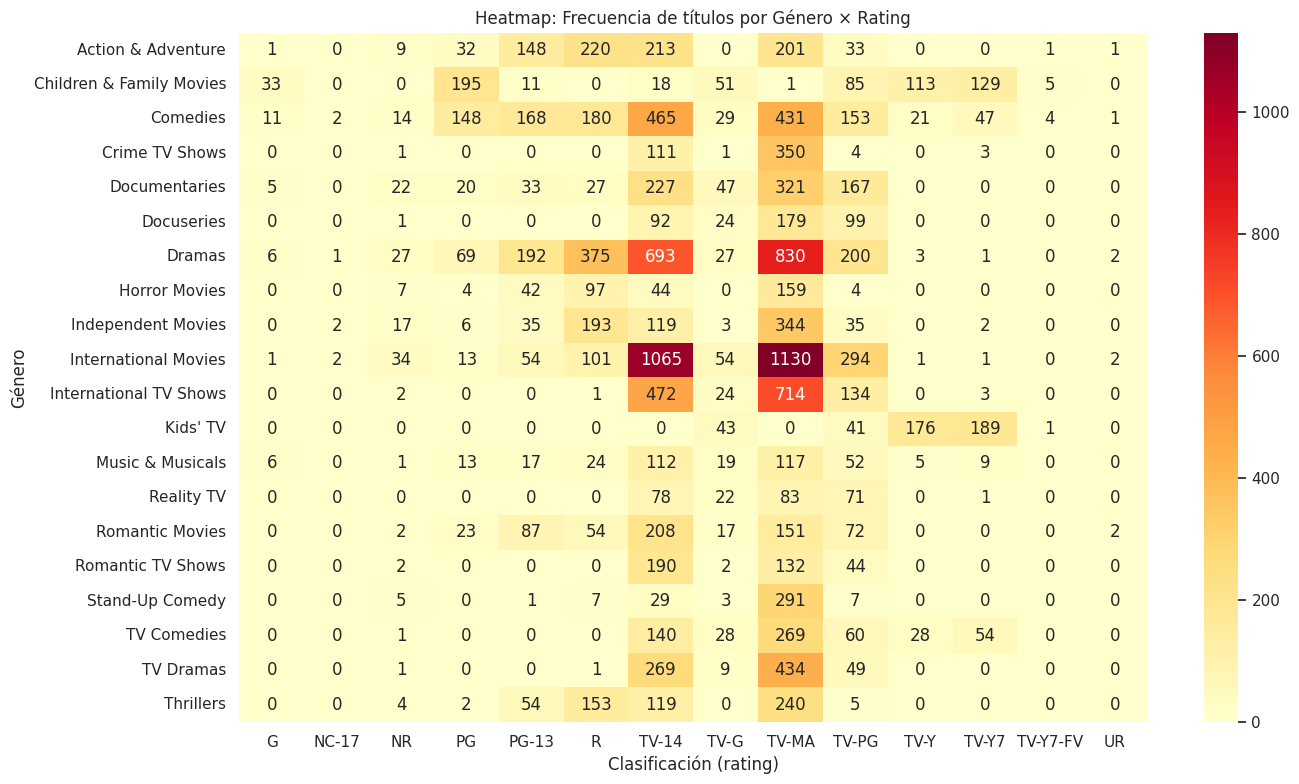

In [51]:
df_genres = (
    df.assign(listed_in=df["listed_in"].astype("string").str.split(","))
      .explode("listed_in", ignore_index=True)
)
df_genres["listed_in"] = df_genres["listed_in"].str.strip()

genre_rating = (
    df_genres.groupby(["listed_in", "rating"])["show_id"]
    .count()
    .reset_index(name="count")
)
pivot_heatmap = genre_rating.pivot(index="listed_in", columns="rating", values="count").fillna(0)

top_genres = df_genres["listed_in"].value_counts().head(20).index
pivot_top = pivot_heatmap.loc[pivot_heatmap.index.intersection(top_genres)]

plt.figure(figsize=(14,8))
sns.heatmap(pivot_top, cmap="YlOrRd", annot=True, fmt=".0f", cbar=True)
plt.title("Heatmap: Frecuencia de títulos por Género × Rating")
plt.xlabel("Clasificación (rating)")
plt.ylabel("Género")
plt.tight_layout()
plt.show()
#Vemos que el heatmap revela que Netflix prioriza géneros adultos (principalmente en TV-MA), mientras los géneros infantiles se concentran en clasificaciones TV-Y/TV-G.